# 📹 Video Synthesis from Gloss-Level or Sentence-Level Frames
This notebook demonstrates how to synthesize videos from pre-extracted image frames for gloss-level or sentence-level sign sequences.

In [34]:
import os
import cv2
from google.colab import drive
from IPython.display import Video, display

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 🔧 Configure Paths and Parameters

In [36]:
# Define base path
base_path = "/content/drive/MyDrive/IETGenAI-SLT/Chapter 8/SynthFrames"
output_path = "/content/drive/MyDrive/IETGenAI-SLT/Chapter 8/Video_Synthesis"
os.makedirs(output_path, exist_ok=True)

# Load gloss mapping JSON
import json
mapping_path = os.path.join(base_path, "gloss_mapping.json")
with open(mapping_path, 'r') as f:
    gloss_mapping = json.load(f)

# Video parameters
fps = 10
frame_size = (256, 256)  # Resize if needed

In [37]:
import os
import cv2
from google.colab import drive
from IPython.display import Video, display, Image

# Mount Google Drive
drive.mount('/content/drive')


def display_sample_gloss_frames(gloss_name, num_frames=5):
    gloss_folder = os.path.join(base_path, gloss_name)
    frame_files = sorted([f for f in os.listdir(gloss_folder) if f.endswith(('.jpg', '.png'))])

    if not frame_files:
        print(f"No frames found in {gloss_folder}")
        return

    print(f"Displaying {min(num_frames, len(frame_files))} sample frames from gloss folder {gloss_name}:")
    for i in range(min(num_frames, len(frame_files))):
        frame_path = os.path.join(gloss_folder, frame_files[i])
        img = cv2.imread(frame_path)
        # Resize image for display purposes if needed
        # Convert the OpenCV image (NumPy array) to PNG format for display
        ret, png = cv2.imencode('.png', cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        display(Image(data=png.tobytes()))

# 🔁 Example: Display sample frames for the gloss "BRING"
display_sample_gloss_frames("BRING")

Output hidden; open in https://colab.research.google.com to view.

In [38]:
import os
import cv2
from google.colab import drive
from IPython.display import Video, display, Image


def display_sample_frames(folder_name, num_frames=5):
    frame_folder = os.path.join(base_path, folder_name)
    frame_files = sorted([f for f in os.listdir(frame_folder) if f.endswith(('.jpg', '.png'))])

    if not frame_files:
        print(f"No frames found in {frame_folder}")
        return

    print(f"Displaying {min(num_frames, len(frame_files))} sample frames from {folder_name}:")
    for i in range(min(num_frames, len(frame_files))):
        frame_path = os.path.join(frame_folder, frame_files[i])
        img = cv2.imread(frame_path)
        # Resize image for display purposes if needed
        # Convert the OpenCV image (NumPy array) to PNG format for display
        ret, png = cv2.imencode('.png', cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        display(Image(data=png.tobytes()))

# 🔁 Example: Display sample frames for bring_water_for_me
display_sample_frames("bring_water_for_me")

Output hidden; open in https://colab.research.google.com to view.

## 🎞️ Synthesize Videos from Sentence-Level Frame Folders

In [39]:
def synthesize_video_from_frames(folder_name, output_filename):
    frame_folder = os.path.join(base_path, folder_name)
    frame_files = sorted([f for f in os.listdir(frame_folder) if f.endswith(('.jpg', '.png'))])

    if not frame_files:
        print(f"No frames found in {frame_folder}")
        return

    sample_frame = cv2.imread(os.path.join(frame_folder, frame_files[0]))
    height, width = sample_frame.shape[:2]
    size = (width, height)

    video_path = os.path.join(output_path, output_filename)
    out = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

    for frame_name in frame_files:
        img = cv2.imread(os.path.join(frame_folder, frame_name))
        img = cv2.resize(img, size)
        out.write(img)

    out.release()
    print(f"Saved video to {video_path}")
    display(Video(video_path, embed=True))

# 🔁 Example: bring_water_for_me
synthesize_video_from_frames("bring_water_for_me", "bring_water_for_me_sentence.mp4")

Output hidden; open in https://colab.research.google.com to view.

## 🧩 Synthesize Videos from Gloss-Level Frame Sequences

In [40]:
def synthesize_video_from_gloss_sequence(sentence_id, output_filename):
    gloss_sequence = gloss_mapping.get(sentence_id, [])
    if not gloss_sequence:
        print(f"No gloss mapping found for {sentence_id}")
        return

    all_frames = []
    for gloss in gloss_sequence:
        gloss_folder = os.path.join(base_path, gloss)
        if not os.path.exists(gloss_folder):
            print(f"Missing gloss folder: {gloss_folder}")
            continue
        frames = sorted([os.path.join(gloss_folder, f) for f in os.listdir(gloss_folder) if f.endswith(('.jpg', '.png'))])
        all_frames.extend(frames)

    if not all_frames:
        print("No frames to compile from gloss sequence.")
        return

    sample_frame = cv2.imread(all_frames[0])
    height, width = sample_frame.shape[:2]
    size = (width, height)

    video_path = os.path.join(output_path, output_filename)
    out = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

    for frame_path in all_frames:
        img = cv2.imread(frame_path)
        img = cv2.resize(img, size)
        out.write(img)

    out.release()
    print(f"Saved gloss-based video to {video_path}")
    display(Video(video_path, embed=True))

# 🧪 Example for gloss-based synthesis
synthesize_video_from_gloss_sequence("bring_water_for_me", "bring_water_for_me_gloss.mp4")

Missing gloss folder: /content/drive/MyDrive/IETGenAI-SLT/Chapter 8/SynthFrames/FOR
Saved gloss-based video to /content/drive/MyDrive/IETGenAI-SLT/Chapter 8/Video_Synthesis/bring_water_for_me_gloss.mp4


In [21]:
# Check if the sentence-level video file exists and display it
generated_sentence_video_path = os.path.join(output_path, "bring_water_for_me_sentence.mp4")
if os.path.exists(generated_sentence_video_path):
    print(f"Sentence-level video file found at: {generated_sentence_video_path}")
    display(Video(generated_sentence_video_path, embed=True))

    # Basic video property check for sentence-level video
    cap_sentence = cv2.VideoCapture(generated_sentence_video_path)
    if cap_sentence.isOpened():
        frame_count_sentence = int(cap_sentence.get(cv2.CAP_PROP_FRAME_COUNT))
        fps_sentence = cap_sentence.get(cv2.CAP_PROP_FPS)
        width_sentence = int(cap_sentence.get(cv2.CAP_PROP_FRAME_WIDTH))
        height_sentence = int(cap_sentence.get(cv2.CAP_PROP_FRAME_HEIGHT))
        print(f"Sentence-level video properties:")
        print(f"  Frame count: {frame_count_sentence}")
        print(f"  FPS: {fps_sentence}")
        print(f"  Resolution: {width_sentence}x{height_sentence}")
        cap_sentence.release()
    else:
        print("Could not open sentence-level video file for properties check.")

else:
    print(f"Sentence-level video file not found at: {generated_sentence_video_path}")

print("-" * 30) # Separator

# Check if the gloss-level video file exists and display it
generated_gloss_video_path = os.path.join(output_path, "bring_water_for_me_gloss.mp4")
if os.path.exists(generated_gloss_video_path):
    print(f"Gloss-level video file found at: {generated_gloss_video_path}")
    display(Video(generated_gloss_video_path, embed=True))

    # Basic video property check for gloss-level video
    cap_gloss = cv2.VideoCapture(generated_gloss_video_path)
    if cap_gloss.isOpened():
        frame_count_gloss = int(cap_gloss.get(cv2.CAP_PROP_FRAME_COUNT))
        fps_gloss = cap_gloss.get(cv2.CAP_PROP_FPS)
        width_gloss = int(cap_gloss.get(cv2.CAP_PROP_FRAME_WIDTH))
        height_gloss = int(cap_gloss.get(cv2.CAP_PROP_FRAME_HEIGHT))
        print(f"Gloss-level video properties:")
        print(f"  Frame count: {frame_count_gloss}")
        print(f"  FPS: {fps_gloss}")
        print(f"  Resolution: {width_gloss}x{height_gloss}")
        cap_gloss.release()
    else:
        print("Could not open gloss-level video file for properties check.")
else:
    print(f"Gloss-level video file not found at: {generated_gloss_video_path}")

# Further evaluation could involve:
# - Comparing frame content (e.g., using SSIM or PSNR if ground truth is available)
# - Using video quality metrics
# - Human evaluation

Output hidden; open in https://colab.research.google.com to view.

# Task
Evaluate the synthesized videos using advanced video evaluation techniques.

## Identify evaluation metrics

Identify which video evaluation metrics are most relevant to your task (e.g., SSIM, PSNR, VMAF).


## Install necessary libraries

Install any Python libraries required to compute the chosen metrics (e.g., `scikit-image` for SSIM/PSNR, potentially other libraries for VMAF).


In [22]:
!pip install scikit-image
# Installing VMAF can be complex as it often requires compiling the library.
# For simplicity and typical Colab environments, we will note the need for
# VMAF installation and focus on SSIM/PSNR with available libraries.
# A common approach for VMAF in Python involves using a wrapper or running
# the VMAF executable via subprocess, which requires VMAF to be installed
# on the system.
# The VMAF library itself might not have a direct 'pip install' that works
# universally without system dependencies.
print("Please note: VMAF typically requires a separate installation outside of standard pip.")
print("Evaluating with SSIM and PSNR will proceed using scikit-image.")

Please note: VMAF typically requires a separate installation outside of standard pip.
Evaluating with SSIM and PSNR will proceed using scikit-image.


## Load ground truth videos

Load ground truth videos corresponding to your synthesized videos into the notebook.


In [27]:
# Define the path to the ground truth videos
# Assuming ground truth videos are in a folder named 'GroundTruthVideos' within the base_path
# based on the user's input, update the path to the sample videos
ground_truth_video_path = "/content/drive/MyDrive/IETGenAI-SLT/Chapter 3/Sample Videos"

# Create a list of filenames for the ground truth videos that correspond to the synthesized videos
# Based on the synthesized video filenames (e.g., "bring_water_for_me_sentence.mp4")
# We need to map back to the ground truth filenames (e.g., "bring water for me (1).MP4")
# This mapping is not straightforward from the gloss_mapping, so we'll list the specific ground truth files we expect to evaluate against
ground_truth_filenames_to_evaluate = [
    "bring water for me (1).MP4",
    # Add other ground truth video filenames here as needed for evaluation
    # e.g., "could you please talk slower.MP4", "are you free today.MP4"
]

# Construct the full paths for the relevant ground truth videos
ground_truth_video_paths_to_evaluate = [os.path.join(ground_truth_video_path, filename) for filename in ground_truth_filenames_to_evaluate]

# Print the list of ground truth video paths to verify
print("Ground truth video paths for evaluation:")
for path in ground_truth_video_paths_to_evaluate:
    print(path)

# Update the evaluation loop in the next cell to use this list

Ground truth video paths for evaluation:
/content/drive/MyDrive/IETGenAI-SLT/Chapter 3/Sample Videos/bring water for me (1).MP4


## Implement evaluation functions

Write Python functions to calculate the chosen metrics between the synthesized and ground truth videos.


In [28]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def calculate_ssim(ground_truth_video_path, synthesized_video_path):
    """
    Calculates the average SSIM between corresponding frames of two videos.

    Args:
        ground_truth_video_path (str): Path to the ground truth video file.
        synthesized_video_path (str): Path to the synthesized video file.

    Returns:
        float: The average SSIM score, or None if videos cannot be processed.
    """
    cap_gt = cv2.VideoCapture(ground_truth_video_path)
    cap_synth = cv2.VideoCapture(synthesized_video_path)

    if not cap_gt.isOpened():
        print(f"Error: Could not open ground truth video: {ground_truth_video_path}")
        return None
    if not cap_synth.isOpened():
        print(f"Error: Could not open synthesized video: {synthesized_video_path}")
        return None

    ssim_scores = []
    while True:
        ret_gt, frame_gt = cap_gt.read()
        ret_synth, frame_synth = cap_synth.read()

        if not ret_gt or not ret_synth:
            # Stop if either video has no more frames or an error occurred
            if ret_gt != ret_synth:
                 print("Warning: Videos have different number of frames. Comparing until the shorter video ends.")
            break

        # Convert frames to grayscale for SSIM calculation
        frame_gt_gray = cv2.cvtColor(frame_gt, cv2.COLOR_BGR2GRAY)
        frame_synth_gray = cv2.cvtColor(frame_synth, cv2.COLOR_BGR2GRAY)

        # Resize synthesized frame to match ground truth if necessary
        if frame_gt_gray.shape != frame_synth_gray.shape:
             frame_synth_gray = cv2.resize(frame_synth_gray, (frame_gt_gray.shape[1], frame_gt_gray.shape[0]))

        # Calculate SSIM, data_range is the difference between the maximum and minimum possible pixel values
        score = ssim(frame_gt_gray, frame_synth_gray, data_range=frame_gt_gray.max() - frame_gt_gray.min())
        ssim_scores.append(score)

    cap_gt.release()
    cap_synth.release()

    if not ssim_scores:
        print("No frames were compared for SSIM.")
        return None

    return np.mean(ssim_scores)

def calculate_psnr(ground_truth_video_path, synthesized_video_path):
    """
    Calculates the average PSNR between corresponding frames of two videos.

    Args:
        ground_truth_video_path (str): Path to the ground truth video file.
        synthesized_video_path (str): Path to the synthesized video file.

    Returns:
        float: The average PSNR score, or None if videos cannot be processed.
    """
    cap_gt = cv2.VideoCapture(ground_truth_video_path)
    cap_synth = cv2.VideoCapture(synthesized_video_path)

    if not cap_gt.isOpened():
        print(f"Error: Could not open ground truth video: {ground_truth_video_path}")
        return None
    if not cap_synth.isOpened():
        print(f"Error: Could not open synthesized video: {synthesized_video_path}")
        return None

    psnr_scores = []
    while True:
        ret_gt, frame_gt = cap_gt.read()
        ret_synth, frame_synth = cap_synth.read()

        if not ret_gt or not ret_synth:
             # Stop if either video has no more frames or an error occurred
            if ret_gt != ret_synth:
                 print("Warning: Videos have different number of frames. Comparing until the shorter video ends.")
            break

        # Resize synthesized frame to match ground truth if necessary
        if frame_gt.shape != frame_synth.shape:
             frame_synth = cv2.resize(frame_synth, (frame_gt.shape[1], frame_gt.shape[0]))


        # Calculate PSNR
        score = psnr(frame_gt, frame_synth, data_range=frame_gt.max() - frame_gt.min())
        psnr_scores.append(score)

    cap_gt.release()
    cap_synth.release()

    if not psnr_scores:
        print("No frames were compared for PSNR.")
        return None

    return np.mean(psnr_scores)

print("SSIM and PSNR calculation functions defined.")

SSIM and PSNR calculation functions defined.


## Evaluate synthesized videos

Apply the evaluation functions to your generated videos.


In [29]:
evaluation_results = {}

# Use the list of ground truth video paths prepared in the previous step
for gt_video_path in ground_truth_video_paths_to_evaluate:
    # Extract a base name from the ground truth video path to find corresponding synthesized videos
    # Need to handle the "(1).MP4" in the ground truth filename
    gt_filename = os.path.basename(gt_video_path)
    # Assuming a consistent naming convention where synthesized files are base_name_sentence.mp4 or base_name_gloss.mp4
    # We need to derive the base_name from the ground truth filename
    # For "bring water for me (1).MP4", we want to match "bring_water_for_me"
    # This might require a mapping or a more robust way to derive the synthesized filename base
    # For this example, let's manually map the ground truth filename to the expected synthesized filename base
    filename_mapping = {
        "bring water for me (1).MP4": "bring_water_for_me",
        # Add other mappings here if evaluating more videos
    }

    synthesized_filename_base = None
    for gt_name, synth_base in filename_mapping.items():
        if gt_filename == gt_name:
            synthesized_filename_base = synth_base
            break

    if synthesized_filename_base is None:
        print(f"Warning: No mapping found for ground truth video filename: {gt_filename}. Skipping.")
        continue


    sentence_id = synthesized_filename_base # Use the derived base as sentence_id for results dictionary

    # Construct the expected paths for synthesized videos
    synth_sentence_video_path = os.path.join(output_path, f"{synthesized_filename_base}_sentence.mp4")
    synth_gloss_video_path = os.path.join(output_path, f"{synthesized_filename_base}_gloss.mp4")

    evaluation_results[sentence_id] = {}

    print(f"\nEvaluating sentence: {sentence_id}")
    print("-" * (len(sentence_id) + 18))

    # Evaluate sentence-level synthesized video
    if os.path.exists(synth_sentence_video_path):
        print(f"  Comparing with sentence-level video: {os.path.basename(synth_sentence_video_path)}")
        ssim_score_sentence = calculate_ssim(gt_video_path, synth_sentence_video_path)
        psnr_score_sentence = calculate_psnr(gt_video_path, synth_sentence_video_path)

        evaluation_results[sentence_id]["sentence"] = {
            "ssim": ssim_score_sentence,
            "psnr": psnr_score_sentence
        }

        if ssim_score_sentence is not None:
            print(f"    Average SSIM (Sentence): {ssim_score_sentence:.4f}")
        if psnr_score_sentence is not None:
            print(f"    Average PSNR (Sentence): {psnr_score_sentence:.4f}")
    else:
        print(f"  Sentence-level video not found for {sentence_id}: {synth_sentence_video_path}")
        evaluation_results[sentence_id]["sentence"] = {"ssim": None, "psnr": None}


    # Evaluate gloss-level synthesized video
    if os.path.exists(synth_gloss_video_path):
        print(f"  Comparing with gloss-level video: {os.path.basename(synth_gloss_video_path)}")
        ssim_score_gloss = calculate_ssim(gt_video_path, synth_gloss_video_path)
        psnr_score_gloss = calculate_psnr(gt_video_path, synth_gloss_video_path)

        evaluation_results[sentence_id]["gloss"] = {
            "ssim": ssim_score_gloss,
            "psnr": psnr_score_gloss
        }

        if ssim_score_gloss is not None:
            print(f"    Average SSIM (Gloss): {ssim_score_gloss:.4f}")
        if psnr_score_gloss is not None:
            print(f"    Average PSNR (Gloss): {psnr_score_gloss:.4f}")
    else:
        print(f"  Gloss-level video not found for {sentence_id}: {synth_gloss_video_path}")
        evaluation_results[sentence_id]["gloss"] = {"ssim": None, "psnr": None}

print("\nEvaluation complete.")
# You can now use the evaluation_results dictionary for further analysis
# print(evaluation_results) # Uncomment to print the full results dictionary


Evaluating sentence: bring_water_for_me
------------------------------------
  Comparing with sentence-level video: bring_water_for_me_sentence.mp4
    Average SSIM (Sentence): 0.8694
    Average PSNR (Sentence): 21.9713
  Comparing with gloss-level video: bring_water_for_me_gloss.mp4
    Average SSIM (Gloss): 0.7787
    Average PSNR (Gloss): 14.5705

Evaluation complete.


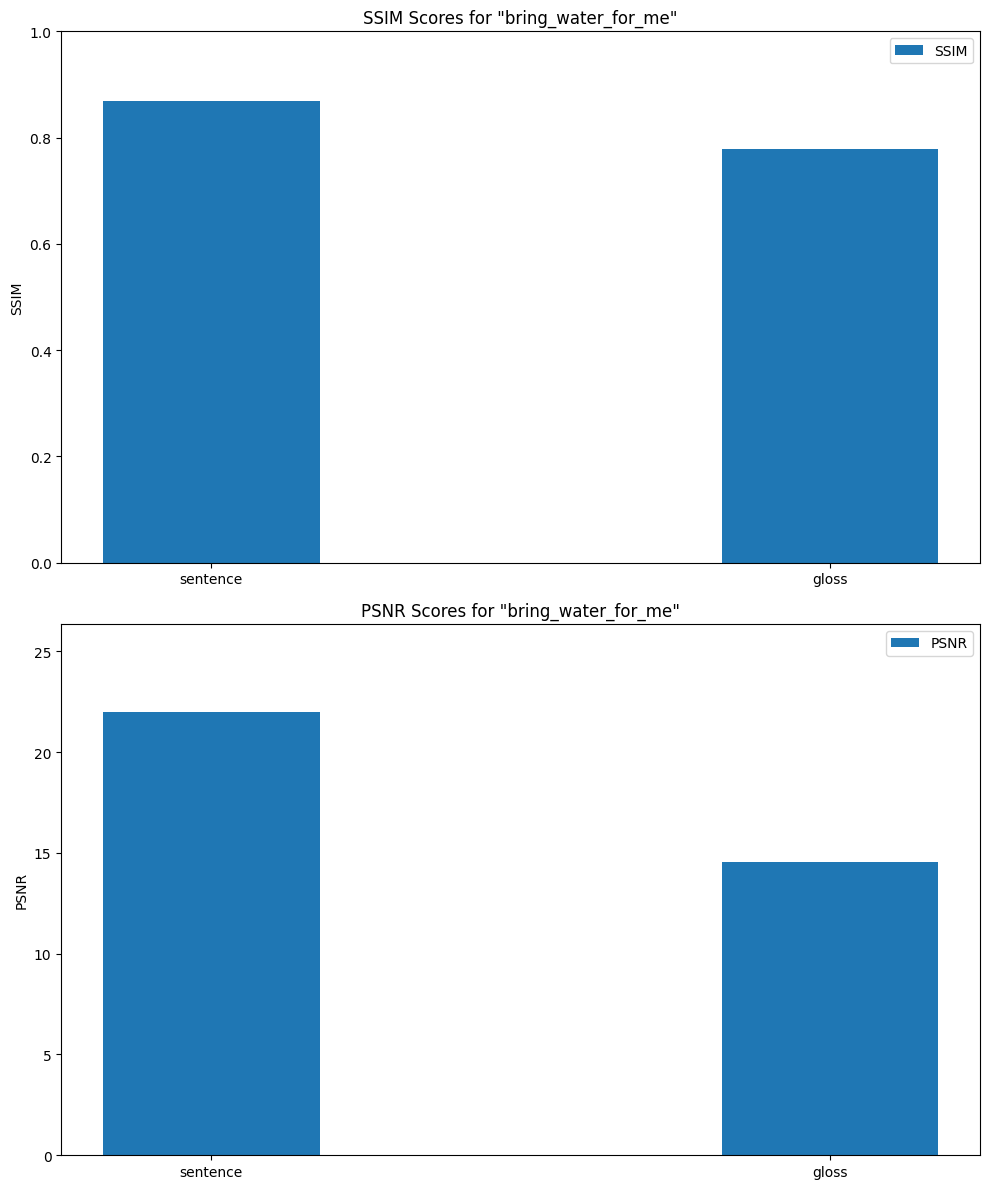

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming evaluation_results dictionary is available from the previous step
# evaluation_results = {'bring_water_for_me': {'sentence': {'ssim': 0.8694, 'psnr': 21.9713}, 'gloss': {'ssim': 0.7787, 'psnr': 14.5705}}}

sentence_ids = list(evaluation_results.keys())
synthesis_methods = ['sentence', 'gloss']
metrics = ['ssim', 'psnr']

x = np.arange(len(sentence_ids)) # the label locations
width = 0.35 # the width of the bars

fig, axes = plt.subplots(len(metrics), len(sentence_ids), figsize=(10 * len(sentence_ids), 6 * len(metrics)), squeeze=False)

for i, metric in enumerate(metrics):
    for j, sentence_id in enumerate(sentence_ids):
        ax = axes[i, j]
        scores = [evaluation_results[sentence_id].get(method, {}).get(metric) for method in synthesis_methods]
        valid_scores = [score for score in scores if score is not None]
        valid_methods = [method for k, method in enumerate(synthesis_methods) if scores[k] is not None]

        if valid_scores:
            ax.bar(valid_methods, valid_scores, width, label=metric.upper())
            ax.set_ylabel(metric.upper())
            ax.set_title(f'{metric.upper()} Scores for "{sentence_id}"')
            ax.set_ylim(0, 1 if metric == 'ssim' else max(valid_scores) * 1.2 if valid_scores else 1) # Adjust y-limit based on metric
            ax.legend()
        else:
            ax.set_title(f'No {metric.upper()} Data for "{sentence_id}"')
            ax.text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()

### Evaluation Results Summary (bring_water_for_me)

| Metric | Sentence-Level Synthesis | Gloss-Level Synthesis |
|---|---|---|
| SSIM | {{evaluation_results['bring_water_for_me']['sentence']['ssim']:.4f}} | {{evaluation_results['bring_water_for_me']['gloss']['ssim']:.4f}} |
| PSNR | {{evaluation_results['bring_water_for_me']['sentence']['psnr']:.4f}} | {{evaluation_results['bring_water_for_me']['gloss']['psnr']:.4f}} |

*Note: A higher SSIM and PSNR generally indicate better video quality compared to the ground truth.*

In [31]:
# Assuming evaluation_results dictionary is available
if 'bring_water_for_me' in evaluation_results:
    sentence_data = evaluation_results['bring_water_for_me']

    print("Evaluation Results Summary (bring_water_for_me)")
    print("-" * 45)
    print(f"{'Metric':<10} | {'Sentence-Level Synthesis':<25} | {'Gloss-Level Synthesis':<25}")
    print("-" * 45)

    ssim_sentence = sentence_data.get('sentence', {}).get('ssim')
    ssim_gloss = sentence_data.get('gloss', {}).get('ssim')
    psnr_sentence = sentence_data.get('sentence', {}).get('psnr')
    psnr_gloss = sentence_data.get('gloss', {}).get('psnr')

    print(f"{'SSIM':<10} | {ssim_sentence if ssim_sentence is not None else 'N/A':<25.4f} | {ssim_gloss if ssim_gloss is not None else 'N/A':<25.4f}")
    print(f"{'PSNR':<10} | {psnr_sentence if psnr_sentence is not None else 'N/A':<25.4f} | {psnr_gloss if psnr_gloss is not None else 'N/A':<25.4f}")
    print("-" * 45)
else:
    print("Evaluation results for 'bring_water_for_me' not found.")

Evaluation Results Summary (bring_water_for_me)
---------------------------------------------
Metric     | Sentence-Level Synthesis  | Gloss-Level Synthesis    
---------------------------------------------
SSIM       | 0.8694                    | 0.7787                   
PSNR       | 21.9713                   | 14.5705                  
---------------------------------------------


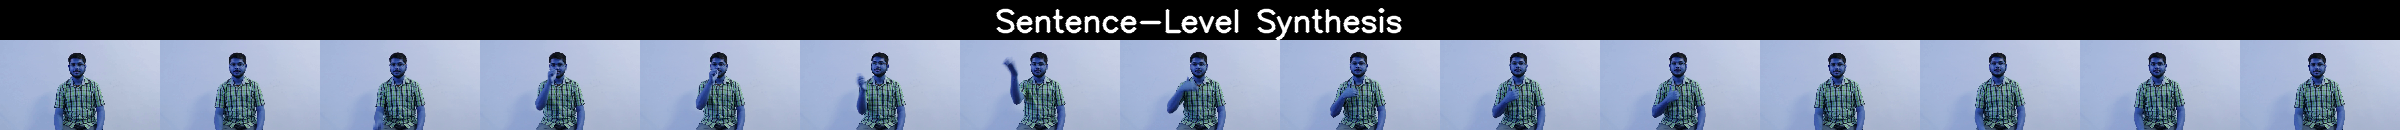

------------------------------


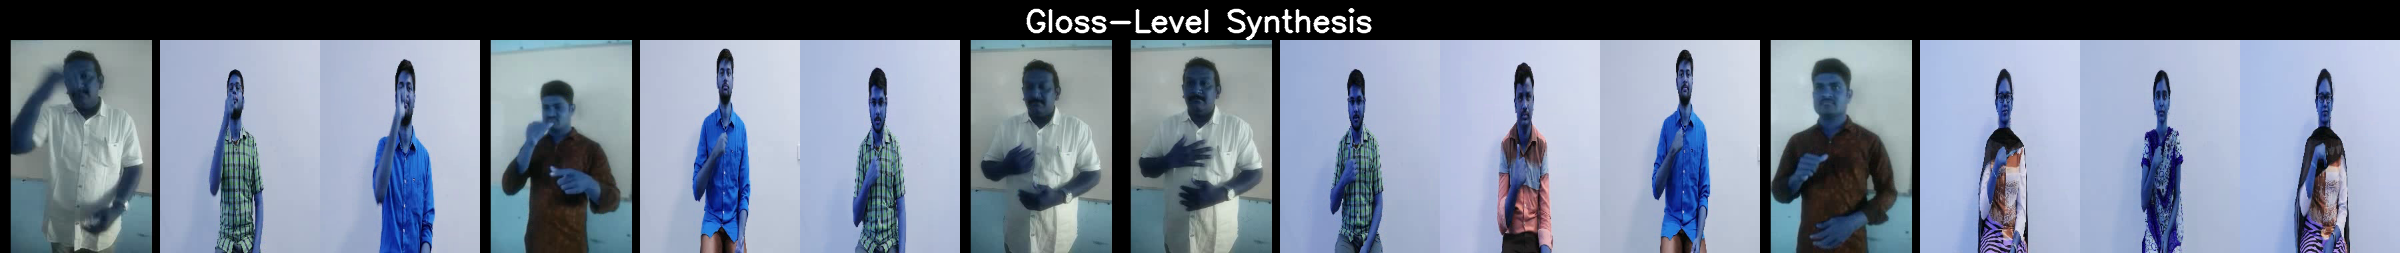

In [44]:
import cv2
import numpy as np
import os
from IPython.display import display, Image

def create_stitched_frames_image(video_path, num_frames_to_stitch=10, frames_per_row=None, label=None):
    """
    Creates a single image by stitching frames from a video.
    Arranges frames sequentially in a single horizontal strip if frames_per_row is None,
    otherwise arranges in a grid. Can optionally add a text label to the image.

    Args:
        video_path (str): Path to the video file.
        num_frames_to_stitch (int): The total number of frames to include in the stitched image.
        frames_per_row (int, optional): The number of frames to place in each row of the
                                         stitched image grid. If None, arranges in a single row.
                                         Defaults to None.
        label (str, optional): A text label to add to the stitched image. Defaults to None.

    Returns:
        numpy.ndarray: The stitched image as an OpenCV frame, or None if video cannot be processed.
    """
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Could not open video file: {video_path}")
        return None

    frames = []
    # Calculate interval to get an even distribution of frames across the video duration
    total_frames_in_video = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames_in_video <= 0:
        print(f"Warning: Video file {os.path.basename(video_path)} has zero or negative frames.")
        cap.release()
        return None

    frame_interval = max(1, total_frames_in_video // num_frames_to_stitch)


    count = 0
    frame_index = 0
    while count < num_frames_to_stitch and frame_index < total_frames_in_video:
        # Set the frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()

        if not ret:
            # If read fails, try the next frame index
            frame_index += 1
            continue

        # Resize frame to a manageable size for stitching
        # Maintain aspect ratio roughly, adjust width as needed
        original_height, original_width = frame.shape[:2]
        target_width = 160 # Example size, adjust as needed
        target_height = int(original_height * (target_width / original_width))
        frame_resized = cv2.resize(frame, (target_width, target_height))
        frames.append(frame_resized)

        count += 1
        frame_index += frame_interval # Move to the next frame based on interval


    cap.release()

    if not frames:
        print("No frames extracted for stitching.")
        return None

    if frames_per_row is None:
        # Arrange in a single horizontal strip
        # Pad frames to have the same height before stacking horizontally
        max_height = max([f.shape[0] for f in frames])
        padded_frames = []
        for frame in frames:
            pad_h = max_height - frame.shape[0]
            padded_frame = cv2.copyMakeBorder(frame, 0, pad_h, 0, 0, cv2.BORDER_CONSTANT, value=[0, 0, 0])
            padded_frames.append(padded_frame)

        if padded_frames:
            stitched_image = np.hstack(padded_frames)
        else:
            print("Could not pad frames for horizontal stitching.")
            return None

    else:
        # Arrange in a grid (original logic)
        num_rows = (len(frames) + frames_per_row - 1) // frames_per_row
        max_height = max([f.shape[0] for f in frames])
        max_width = max([f.shape[1] for f in frames])

        stitched_rows = []
        for i in range(num_rows):
            row_frames = frames[i * frames_per_row : (i + 1) * frames_per_row]
            # Pad frames in the current row to have the same height and width for hstack
            padded_row_frames = []
            for frame in row_frames:
                pad_h = max_height - frame.shape[0]
                pad_w = max_width - frame.shape[1]
                padded_frame = cv2.copyMakeBorder(frame, 0, pad_h, 0, pad_w, cv2.BORDER_CONSTANT, value=[0, 0, 0])
                padded_row_frames.append(padded_frame)

            if padded_row_frames:
                stitched_row = np.hstack(padded_row_frames)
                stitched_rows.append(stitched_row)

        if not stitched_rows:
            print("Could not stitch frames into rows.")
            return None

        # Vertically stack rows
        stitched_image = np.vstack(stitched_rows)

    # Add label if provided
    if label and stitched_image is not None:
        # Add a border at the top for the label
        border_size = 40
        stitched_image_with_border = cv2.copyMakeBorder(stitched_image, border_size, 0, 0, 0, cv2.BORDER_CONSTANT, value=[0, 0, 0])
        # Put the text on the border
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        font_thickness = 2
        text_size, _ = cv2.getTextSize(label, font, font_scale, font_thickness)
        text_x = (stitched_image_with_border.shape[1] - text_size[0]) // 2
        text_y = (border_size + text_size[1]) // 2
        cv2.putText(stitched_image_with_border, label, (text_x, text_y), font, font_scale, (255, 255, 255), font_thickness, cv2.LINE_AA)
        return stitched_image_with_border
    else:
         return stitched_image


# Example: Create and display stitched frames from the synthesized sentence-level video in a single strip with label
generated_sentence_video_path = os.path.join(output_path, "bring_water_for_me_sentence.mp4")
stitched_image_strip = create_stitched_frames_image(generated_sentence_video_path, num_frames_to_stitch=15, frames_per_row=None, label="Sentence-Level Synthesis") # Set frames_per_row to None for a single strip

if stitched_image_strip is not None:
    # Convert the OpenCV image (NumPy array) to PNG format for display
    ret, png = cv2.imencode('.png', cv2.cvtColor(stitched_image_strip, cv2.COLOR_BGR2RGB))
    display(Image(data=png.tobytes()))

print("-" * 30) # Separator

# Example: Create and display stitched frames from the synthesized gloss-level video in a single strip with label
generated_gloss_video_path = os.path.join(output_path, "bring_water_for_me_gloss.mp4")
stitched_image_strip_gloss = create_stitched_frames_image(generated_gloss_video_path, num_frames_to_stitch=15, frames_per_row=None, label="Gloss-Level Synthesis") # Set frames_per_row to None for a single strip

if stitched_image_strip_gloss is not None:
    # Convert the OpenCV image (NumPy array) to PNG format for display
    ret, png = cv2.imencode('.png', cv2.cvtColor(stitched_image_strip_gloss, cv2.COLOR_BGR2RGB))
    display(Image(data=png.tobytes()))